In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table

# Access eBOSS quasars data

In this notebook we show a simple way to retrive a small amount of data from the SDSS repository and explore what is those.  We might use this data in future classes, for now we will only explore them, and maybe do some plots...

(Adapted from the one originally made for MACSS 2019)

## PART 1: Get the data

You will need to download:
    - The quasar catalog https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/  (~1Gb)
    - The spPlates files as many as required for the sample we will define later... but be careful and dot download everything as it is ~300Gb. 
    
You can download the files directly from https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/  and https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/  digging in each plate directory. Or follow the notebook... 

In [2]:
#Define the URL for the data to download and the filename as well as the local directory where to be saved.  
DATA_URL="https://data.sdss.org/sas/dr14/eboss/qso/DR14Q/"
file="DR14Q_v4_4.fits"
local_dir="./"
local_file = os.path.join(local_dir,file)

In [3]:
#Simple instructions to download the catalog, it checks it don't exist...
#It can take a while so don't desperate.

if not os.path.exists(file):
        print("downloading DR14 quasar dataset from %s to %s"
              % (DATA_URL+file, local_file ))
        tmp = urllib.request.urlretrieve(DATA_URL+local_file, local_file)
        print ("Downloaded file"+local_file)
else:
    print("%s already exist"%(local_file))


./DR14Q_v4_4.fits already exist


 We have downloaded the qso catalog, but since it contains so many objects it is not viable we work with it in our laptops, so lets make a selection.  First lets load the catalog and see its content

In [4]:
catalog=Table.read('DR14Q_v4_4.fits')
catalog.colnames

['SDSS_NAME',
 'RA',
 'DEC',
 'THING_ID',
 'PLATE',
 'MJD',
 'FIBERID',
 'SPECTRO',
 'Z',
 'Z_ERR',
 'SOURCE_Z',
 'Z_VI',
 'Z_PIPE',
 'Z_PIPE_ERR',
 'ZWARNING',
 'Z_PCA',
 'Z_PCA_ER',
 'Z_MGII',
 'BOSS_TARGET1',
 'ANCILLARY_TARGET1',
 'ANCILLARY_TARGET2',
 'EBOSS_TARGET0',
 'EBOSS_TARGET1',
 'EBOSS_TARGET2',
 'N_SPEC_SDSS',
 'N_SPEC_BOSS',
 'N_SPEC',
 'PLATE_DUPLICATE',
 'MJD_DUPLICATE',
 'FIBERID_DUPLICATE',
 'SPECTRO_DUPLICATE',
 'BI_CIV',
 'ERR_BI_CIV',
 'RUN_NUMBER',
 'RERUN_NUMBER',
 'COL_NUMBER',
 'FIELD_NUMBER',
 'OBJ_ID',
 'PSFFLUX',
 'IVAR_PSFFLUX',
 'PSFMAG',
 'ERR_PSFMAG',
 'MI',
 'GAL_EXT',
 'RASS_COUNTS',
 'RASS_COUNTS_SNR',
 'SDSS2ROSAT_SEP',
 'FLUX_0.2_2.0keV',
 'FLUX_0.2_2.0keV_ERR',
 'FLUX_2.0_12.0keV',
 'FLUX_2.0_12.0keV_ERR',
 'FLUX_0.2_12.0keV',
 'FLUX_0.2_12.0keV_ERR',
 'LUM_0.2_12.0keV',
 'SDSS2XMM_SEP',
 'GALEX_MATCHED',
 'FUV',
 'FUV_IVAR',
 'NUV',
 'NUV_IVAR',
 'JMAG',
 'ERR_JMAG',
 'JSNR',
 'JRDFLAG',
 'HMAG',
 'ERR_HMAG',
 'HSNR',
 'HRDFLAG',
 'KMAG',
 'ERR_K

In [5]:
catalog

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,bytes1,float64,float64,int16,bytes1,int16,int16,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.45+174625.4,0.001898274356335605,17.773739123771385,268270422,7596,56945,162,BOSS,2.309,0.0,VI,2.309000015258789,2.307750701904297,0.0010300044668838382,0,2.3045657000000004,-1.0,-1.0,0,0,0,0,4096,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.0379366874694824 .. 2.631136417388916,12.372532844543457 .. 0.8706143498420715,22.440338134765625 .. 21.372461318969727,0.2871243953704834 .. 0.38545534014701843,-24.410782,0.12021728605031967 .. 0.03581845760345459,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.30231887102127075,8.785573140381722,0.7275648713111877,4.537358964921044,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1.0,-1.0,-1.0
000000.57+055630.8,0.0023754761888312714,5.941903005523435,163544156,8740,57367,694,BOSS,2.1031202999999996,0.0,AUTO,-1.0,2.1031203269958496,0.0009241577354259787,0,2.0996384999999997,2.0983490000000002,2.0983490000000002,0,0,0,0,2048,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.1197296380996704 .. 4.730101585388184,9.196866035461426 .. 0.8192309737205505,22.360628128051758 .. 20.78717613220215,0.3101848363876343 .. 0.2420300394296646,-24.732,0.2338263988494873 .. 0.06966802477836609,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.0,0.0,0.0,0.0,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,16.969,0.127,8.5,0.9904,16.887999999999998,0.409,2.700000047683716,1.004,11.861,nan,1.399999976158142,0.9819,8.604,0.127,0.699999988079071,0.9478,hH00,BCUU,0.706171,1.0,1.2885136657753169e-31,2.4790984841010035e-32,1.229889058862803e-31,4.504542253745802e-32,1.496424644649041e-31,4.7290496259357616

As you see there are about 500,000 objetcs, this is what is used for a real life analysis. For this day we'll use a 
few only... 

In [6]:
#select objects with THING_ID>0. Also select the qso's within the zmin, zmax redshift interval, defined so that
#we capture many lyman alpha quasars 
w=(catalog['THING_ID']>0) & (catalog['Z']>2) & (catalog['Z']<4) & (catalog['RA']!=catalog['DEC'])& (catalog['RA']>0) & (catalog['DEC']>0)
reduced_cat=catalog[w]
reduced_cat

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,bytes1,float64,float64,int16,bytes1,int16,int16,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
000000.45+174625.4,0.001898274356335605,17.773739123771385,268270422,7596,56945,162,BOSS,2.309,0.0,VI,2.309000015258789,2.307750701904297,0.0010300044668838382,0,2.3045657000000004,-1.0,-1.0,0,0,0,0,4096,0,0,1,1,0 .. -1,0 .. -1,0 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.0379366874694824 .. 2.631136417388916,12.372532844543457 .. 0.8706143498420715,22.440338134765625 .. 21.372461318969727,0.2871243953704834 .. 0.38545534014701843,-24.410782,0.12021728605031967 .. 0.03581845760345459,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.30231887102127075,8.785573140381722,0.7275648713111877,4.537358964921044,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,-1.0,-1.0,-1.0
000000.57+055630.8,0.0023754761888312714,5.941903005523435,163544156,8740,57367,694,BOSS,2.1031202999999996,0.0,AUTO,-1.0,2.1031203269958496,0.0009241577354259787,0,2.0996384999999997,2.0983490000000002,2.0983490000000002,0,0,0,0,2048,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.1197296380996704 .. 4.730101585388184,9.196866035461426 .. 0.8192309737205505,22.360628128051758 .. 20.78717613220215,0.3101848363876343 .. 0.2420300394296646,-24.732,0.2338263988494873 .. 0.06966802477836609,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.0,0.0,0.0,0.0,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,16.969,0.127,8.5,0.9904,16.887999999999998,0.409,2.700000047683716,1.004,11.861,nan,1.399999976158142,0.9819,8.604,0.127,0.699999988079071,0.9478,hH00,BCUU,0.706171,1.0,1.2885136657753169e-31,2.4790984841010035e-32,1.229889058862803e-31,4.504542253745802e-32,1.496424644649041e-31,4.7290496259357616

 We still have about 200,000 objects. Because we have limited and download a few files only, lets order all this qso's by the PLATE in which they were observed. You could also select them by position, or other randomly. 

In [7]:
#Group the catalog by PLATE and select only first N objects you want to use... 
#Note I've used only 50 here but the idea would be to download many more... 
cat_by_plate=reduced_cat.group_by('PLATE')
small_cat=cat_by_plate[0:100]
small_cat

SDSS_NAME,RA,DEC,THING_ID,PLATE,MJD,FIBERID,SPECTRO,Z,Z_ERR,SOURCE_Z,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE [51],MJD_DUPLICATE [51],FIBERID_DUPLICATE [51],SPECTRO_DUPLICATE [51],BI_CIV,ERR_BI_CIV,RUN_NUMBER,RERUN_NUMBER,COL_NUMBER,FIELD_NUMBER,OBJ_ID,PSFFLUX [5],IVAR_PSFFLUX [5],PSFMAG [5],ERR_PSFMAG [5],MI,GAL_EXT [5],RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,CC_FLAGS,PH_FLAGS,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP
-,deg,deg,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,km / s,km / s,-,-,-,-,-,nanomaggies,-,mag,mag,-,mag,counts/s,-,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / s,arcsec,-,-,-,-,-,Vega,Vega,-,-,Vega,Vega,-,-,Vega,Vega,-,-,arcsec,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,arcsec,-,W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),W / (Hz m2),-,mJy,-,arcsec
bytes18,float64,float64,int32,int16,int32,int16,bytes4,float64,float64,bytes4,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32,int32,int32,bytes1,float64,float64,int16,bytes1,int16,int16,bytes1,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes4,bytes4,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64
002927.12+005959.1,7.3630113436661695,0.9997557609564308,119126428,3586,55181,594,BOSS,2.197,0.0,VI,2.197000026702881,2.2041704654693604,0.0019501503556966786,0,2.2176769,2.1851583,2.1851583,81920,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,1.082460641860962 .. 5.404262542724609,17.25505828857422 .. 1.4724500179290771,22.39624786376953 .. 20.648351669311523,0.2337706983089447 .. 0.15968485176563263,-24.988821,0.1120922863483429 .. 0.03339763358235359,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.02334750071167946,16.08032872380867,0.013374969363212584,124.61452751266,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,17.288,0.163,6.699999809265137,0.9566,16.323,0.259,4.199999809265137,0.9101,12.138,0.42,2.5999999046325684,0.8814,8.777000000000001,0.163,-0.5,1.124,0000,BBCU,0.402873,1.0,1.5315462999617797e-31,3.49182712801592e-32,2.369125168884542e-31,3.257587838095501e-32,2.946421964418005e-31,8.163112961552275e-32,3.268164172192872e-31,4.075393363894775e-32,0,-1.0,-1.0,-1.0
002951.92+011450.1,7.466360282002142,1.247255758767018,124326006,3586,55181,622,BOSS,2.092,0.0,VI,2.0920000076293945,2.1335699558258057,0.0009776175720617175,0,2.1113958,2.0834067,2.0834067,16384,0,0,0,0,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,- .. -,0.0,0.0,0,-,0,0,-,0.9829164743423462 .. 4.830942153930664,19.4893741607666 .. 1.8968703746795654,22.497323989868164 .. 20.765296936035156,0.24063898622989655 .. 0.15602481365203857,-24.948919,0.11912687122821808 .. 0.03549357131123543,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.034334227442741394,26.000245826780446,0.04506143182516098,34.706384627050674,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,17.435,0.189,5.69999

This will be our small catalog to use. Let's see how the qso's are distributed compared to the full catalog.

Text(0, 0.5, 'DEC')

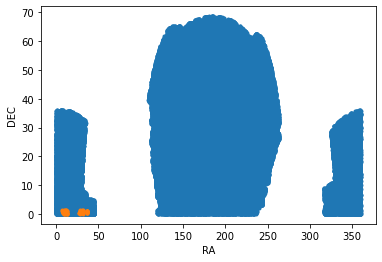

In [8]:
#Lets plot the distribution in RA/DEC of the full catalog, and the small catalog
plt.scatter(cat_by_plate['RA'],cat_by_plate['DEC'],marker='.')
plt.scatter(small_cat['RA'],small_cat['DEC'],marker='.')
plt.xlabel('RA')
plt.ylabel('DEC')

In [9]:
thing_id=small_cat['THING_ID']
fiberid=small_cat['FIBERID']
plate=small_cat['PLATE']
zqso=small_cat['Z']

Now each of the spectra is located in specific files called spPlate-PLATE-MJD. So lets make a list of all the spPlates that we need 

In [10]:
#GET THE UNIQUE PLATES WE NEED TO DOWNLOAD FOR THE SELECTION ABOVE AND CONSTRUCT THE FILE NAMES WE NEED. 
plate_list=[]
for p,m in zip(small_cat['PLATE'],small_cat['MJD']):
    plate_list.append(str(p)+'/spPlate-'+str(p)+'-'+str(m)+'.fits')
plate_list=np.unique(plate_list)
plate_list

array(['3586/spPlate-3586-55181.fits', '3587/spPlate-3587-55182.fits',
       '3588/spPlate-3588-55184.fits', '3589/spPlate-3589-55186.fits',
       '3590/spPlate-3590-55201.fits', '3606/spPlate-3606-55182.fits',
       '3609/spPlate-3609-55201.fits', '3615/spPlate-3615-55179.fits',
       '3615/spPlate-3615-55208.fits', '3615/spPlate-3615-56544.fits'],
      dtype='<U28')

Now lets download the files the same way we did with the catalog

In [11]:
#Takes some minutes... we will have this data on a 
plates_url='https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/'
plates_local='./spPlates/'

if not os.path.exists(plates_local):
        os.makedirs(plates_local)

for plate_ in plate_list:
    url_file = os.path.join(plates_url,plate_)
    local_file=plates_local+plate_.split("/")[1]
    if not os.path.exists(local_file):
        print("downloading spplate from %s to %s"
              % (url_file, local_file))
        tmp = urllib.request.urlretrieve(url_file, local_file)
    else:
        print('%s  %s present on disk. '%(url_file,local_file))


https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3586/spPlate-3586-55181.fits  ./spPlates/spPlate-3586-55181.fits present on disk. 
https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3587/spPlate-3587-55182.fits  ./spPlates/spPlate-3587-55182.fits present on disk. 
https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3588/spPlate-3588-55184.fits  ./spPlates/spPlate-3588-55184.fits present on disk. 
https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3589/spPlate-3589-55186.fits  ./spPlates/spPlate-3589-55186.fits present on disk. 
https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3590/spPlate-3590-55201.fits  ./spPlates/spPlate-3590-55201.fits present on disk. 
https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3606/spPlate-3606-55182.fits  ./spPlates/spPlate-3606-55182.fits present on disk. 
https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/3609/spPlate-3609-55201.fits  ./spPlates/spPlate-3609-55201.fits present on disk. 
https:

If downloading multiple files, as many as to have a about 10K qso's, maybe is better to save the filenames list to a file 
and use it to download the files from terminal... it could be a little faster...

## PART 2: Explore the qso data. 

Lets explore what is in those file we've downloaded. For a full description of the spPlates look 
https://data.sdss.org/datamodel/files/BOSS_SPECTRO_REDUX/RUN2D/PLATE4/spPlate.html  

In [12]:
#Explore the fist of the spPlates.
file=plates_local+plate_list[2].split("/")[1]
plate1=pyfits.open(file)
print(file)

./spPlates/spPlate-3588-55184.fits


In [13]:
plate1.info()

Filename: ./spPlates/spPlate-3588-55184.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     229   (4647, 1000)   float32   
  1  IVAR          1 ImageHDU        16   (4647, 1000)   float32   
  2  ANDMASK       1 ImageHDU        15   (4647, 1000)   int32   
  3  ORMASK        1 ImageHDU        15   (4647, 1000)   int32   
  4  WAVEDISP      1 ImageHDU        16   (4647, 1000)   float32   
  5  PLUGMAP       1 BinTableHDU     88   1000R x 35C   [5J, 6A, D, D, 5E, E, E, E, 16A, D, D, J, J, J, J, J, J, E, 21A, E, E, J, K, K, K, K, J, 4A, J, J, J, 5E, 5E, 5J, E]   
  6  SKY           1 ImageHDU         8   (4647, 1000)   float32   


In [14]:
#What is in the PLUGMAP
plugmap=plate1['PLUGMAP'].data
Table(plugmap)

OBJID [5],HOLETYPE,RA,DEC,MAG [5],STARL,EXPL,DEVAUCL,OBJTYPE,XFOCAL,YFOCAL,SPECTROGRAPHID,FIBERID,THROUGHPUT,PRIMTARGET,SECTARGET,OFFSETID,SCI_EXPTIME,SOURCETYPE,LAMBDA_EFF,ZOFFSET,BLUEFIBER,BOSS_TARGET1,BOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,RUN,RERUN,CAMCOL,FIELD,ID,CALIBFLUX [5],CALIBFLUX_IVAR [5],CALIB_STATUS [5],SFD_EBV
int32,str6,float64,float64,float32,float32,float32,float32,str16,float64,float64,int32,int32,int32,int32,int32,int32,float32,str21,float32,float32,int32,int64,int64,int64,int64,int32,str4,int32,int32,int32,float32,float32,int32,float32
2728 .. 124,OBJECT,11.382137999999998,-0.028145161,23.1102 .. 18.8796,0.0,0.0,0.0,GALAXY,301.32296,-6.1338778,1,1,32026,0,0,1,0.0,LRG,5400.0,0.0,0,9,0,0,0,2728,301,3,489,124,1.1782539 .. 58.678192,5.320078 .. 0.20767432,24577 .. 24577,0.015352863
0 .. 0,OBJECT,11.480943000000025,-0.1143519,26.572 .. 21.939,0.0,0.0,0.0,NA,323.06207,-24.943743,1,2,36757,0,0,1,0.0,QSO_GRI,5400.0,0.0,1,0,0,536870912,0,0,,0,0,0,0.30778626 .. 1.4333534,15.011751 .. 1.1993102,24577 .. 24577,0.016157152
4263 .. 485,OBJECT,11.410420999999985,-0.28305497,24.1479 .. 20.822,0.0,0.0,0.0,GALAXY,307.58125,-61.727048,1,3,36676,0,0,1,0.0,LRG,5400.0,0.0,0,6,0,0,0,4263,301,3,192,485,0.28030014 .. 9.6534,9.12571 .. 0.36943063,24577 .. 24577,0.017159209
2728 .. 165,OBJECT,11.413002000000006,-0.06723294,22.4935 .. 21.353,0.0,0.0,0.0,QSO,308.10264,-14.630038,1,4,30125,0,0,1,0.0,QSO,4000.0,0.0,1,65536,0,0,0,2728,301,3,489,165,2.093434 .. 4.789381,17.604595 .. 1.7493329,24577 .. 24577,0.015407031
2728 .. 350,OBJECT,11.370152000000019,-0.042618017,23.824 .. 20.9157,0.0,0.0,0.0,GALAXY,298.6931,-9.288649,1,5,39729,0,0,1,0.0,LRG,5400.0,0.0,0,6,0,0,0,2728,301,3,489,350,0.4969688 .. 8.739886,6.0304847 .. 0.33227256,24577 .. 24577,0.01523817
0 .. 0,OBJECT,11.350979999999993,0.038246182,0.0 .. 0.0,0.0,0.0,0.0,SKY,294.4878,8.3391139,1,6,30231,0,0,1,0.0,NA,5400.0,0.0,1,0,0,0,0,0,,0,0,0,0.0 .. 0.0,0.0 .. 0.0,0 .. 0,0.014600264
2728 .. 611,OBJECT,11.457323999999971,-0.067333797,24.1476 .. 20.8979,0.0,0.0,0.0,GALAXY,317.85281,-14.68401,1,7,33974,0,0,1,0.0,LRG,5400.0,0.0,0,14,0,0,0,2728,301,3,489,611,0.2812808 .. 8.899108,6.235111 .. 0.316698,24577 .. 24577,0.016051836
4263 .. 249,OBJECT,11.308869000000016,-0.33872519,22.3747 .. 21.0934,0.0,0.0,0.0,QSO,285.30313,-73.804892,1,8,34094,0,0,1,0.0,QSO,4000.0,0.0,1,218112,0,0,0,4263,301,3,191,249,2.4854016 .. 6.269193,26.228327 .. 2.2249532,24577 .. 24577,0.0151739605
2728 .. 550,OBJECT,11.438775000000021,-0.01381775,23.4368 .. 20.9568,0.0,0.0,0.0,GALAXY,313.76776,-3.0111716,1,9,34845,0,0,1,0.0,LRG,5400.0,0.0,0,6,0,0,0,2728,301,3,489,550,0.81547946 .. 8.444346,5.949246 .. 0.3295001,24577 .. 24577,0.016044602


As you can see an spPlate has more than only qso's... so we need to retrive only the information for the quasars we have selected in the small catalog. Then lets to this for the first spPlate. 

In [15]:
#Select from small catalog only qso's that are in first spPlate.
thisplate=plate_list[2].split("/")[0]
w=plate==int(thisplate)
ids_=fiberid[w]
zqso_=zqso[w]

In [16]:
#Select from the plugmap nly the qso's that are in the small catalog. 
w=np.in1d(plugmap['FIBERID'],ids_)
small_plugmap=plugmap[w]
Table(small_plugmap)

OBJID [5],HOLETYPE,RA,DEC,MAG [5],STARL,EXPL,DEVAUCL,OBJTYPE,XFOCAL,YFOCAL,SPECTROGRAPHID,FIBERID,THROUGHPUT,PRIMTARGET,SECTARGET,OFFSETID,SCI_EXPTIME,SOURCETYPE,LAMBDA_EFF,ZOFFSET,BLUEFIBER,BOSS_TARGET1,BOSS_TARGET2,ANCILLARY_TARGET1,ANCILLARY_TARGET2,RUN,RERUN,CAMCOL,FIELD,ID,CALIBFLUX [5],CALIBFLUX_IVAR [5],CALIB_STATUS [5],SFD_EBV
int32,str6,float64,float64,float32,float32,float32,float32,str16,float64,float64,int32,int32,int32,int32,int32,int32,float32,str21,float32,float32,int32,int64,int64,int64,int64,int32,str4,int32,int32,int32,float32,float32,int32,float32
4247 .. 718,OBJECT,8.609286999999995,0.43390398,24.4282 .. 21.2603,0.0,0.0,0.0,QSO,-303.31522,94.667707,2,510,20902,0,0,1,0.0,QSO,4000.0,0.0,1,201728,0,0,0,4247,301,5,166,718,0.027207524 .. 7.9276724,41.328213 .. 2.4501188,24577 .. 24577,0.023727499
2728 .. 124,OBJECT,8.840054800000019,0.32804696,21.5524 .. 20.1111,0.0,0.0,0.0,QSO,-252.71777,71.500976,2,531,31385,0,0,1,0.0,QSO,4000.0,0.0,1,218112,0,0,0,2728,301,4,472,124,5.4657245 .. 18.707598,9.604131 .. 1.0337118,24577 .. 24577,0.02560444
2728 .. 109,OBJECT,9.127879399999983,1.0890749,21.238 .. 20.3946,0.0,0.0,0.0,QSO,-190.12144,237.46443,2,542,26992,0,0,1,0.0,QSO,4000.0,0.0,1,218112,0,0,0,2728,301,6,474,109,6.5646873 .. 13.541123,9.037404 .. 1.1003689,24577 .. 24577,0.019053401
2728 .. 119,OBJECT,9.154982700000005,1.0540228,20.73 .. 19.8768,0.0,0.0,0.0,QSO,-184.17475,229.77254,2,544,34839,0,0,1,0.0,QSO,4000.0,0.0,1,250880,0,0,0,2728,301,6,474,119,10.947064 .. 21.82339,6.778867 .. 1.0285338,24577 .. 24577,0.019327328
4247 .. 405,OBJECT,9.285265900000013,0.48217577,23.9399 .. 21.0147,0.0,0.0,0.0,QSO,-155.62899,105.01629,2,570,36137,0,0,1,0.0,QSO,4000.0,0.0,1,66560,0,0,0,4247,301,5,171,405,0.13410223 .. 6.5540667,42.57581 .. 2.5627565,24577 .. 24577,0.023703171
4128 .. 539,OBJECT,9.475506800000005,0.73854072,23.1736 .. 22.1007,0.0,0.0,0.0,QSO,-114.20935,160.84517,2,608,38723,0,0,1,0.0,QSO,4000.0,0.0,1,197632,0,0,0,4128,301,5,186,539,1.133782 .. 1.7723988,15.869436 .. 1.2619082,24577 .. 24577,0.020222092
2728 .. 254,OBJECT,9.59560620000002,0.24417123,22.8584 .. 22.246,0.0,0.0,0.0,QSO,-87.981811,53.148312,2,657,31211,0,0,1,0.0,QSO,4000.0,0.0,1,131072,0,0,0,2728,301,4,477,254,1.5910642 .. 1.9950564,13.630089 .. 1.2745118,24577 .. 24577,0.020373492
2728 .. 580,OBJECT,9.777702599999998,0.27370017,23.7745 .. 21.7526,0.0,0.0,0.0,QSO,-48.350271,59.555001,2,694,46848,0,0,1,0.0,QSO,4000.0,0.0,1,196608,0,0,0,2728,301,4,478,580,0.49154624 .. 3.5955884,16.913847 .. 1.1224526,24577 .. 24577,0.018352574
2728 .. 282,OBJECT,10.108852000000013,0.39493532,22.381 .. 21.7696,0.0,0.0,0.0,QSO,23.678527,85.933118,2,740,27896,0,0,1,0.0,QSO,4000.0,0.0,1,4096,0,0,0,2728,301,4,480,282,2.35942 .. 3.392507,11.2415905 .. 1.124278,24577 .. 24577,0.01730938


So far so good, but haven't selected the spectra, only the information about the qso's. So lets get the observed flux for the qso's, i.e. the spectra!

The wavelenght is given by the parameters 'COEFF0' and 'COEFF1' present in the header of the first hdu of the spPlate file, while the flux is an array in the same hdu.

In [17]:
#Get the wavelenght
pltheader=plate1[0].header
coeff0=pltheader['COEFF0']
coeff1=pltheader['COEFF1']

In [64]:
#Get the spectra
flux=plate1[0].data
ivar=plate1[1].data
logwave=coeff0+coeff1*np.arange(flux.shape[1])
wavelengths = 10**logwave

In [65]:
wavelengths

array([ 3553.03920815,  3553.85741986,  3554.67581999, ...,
       10351.42166679, 10353.80544415, 10356.18977045])

In [66]:
flux = flux[ids_-1]
ivar = ivar[ids_-1]

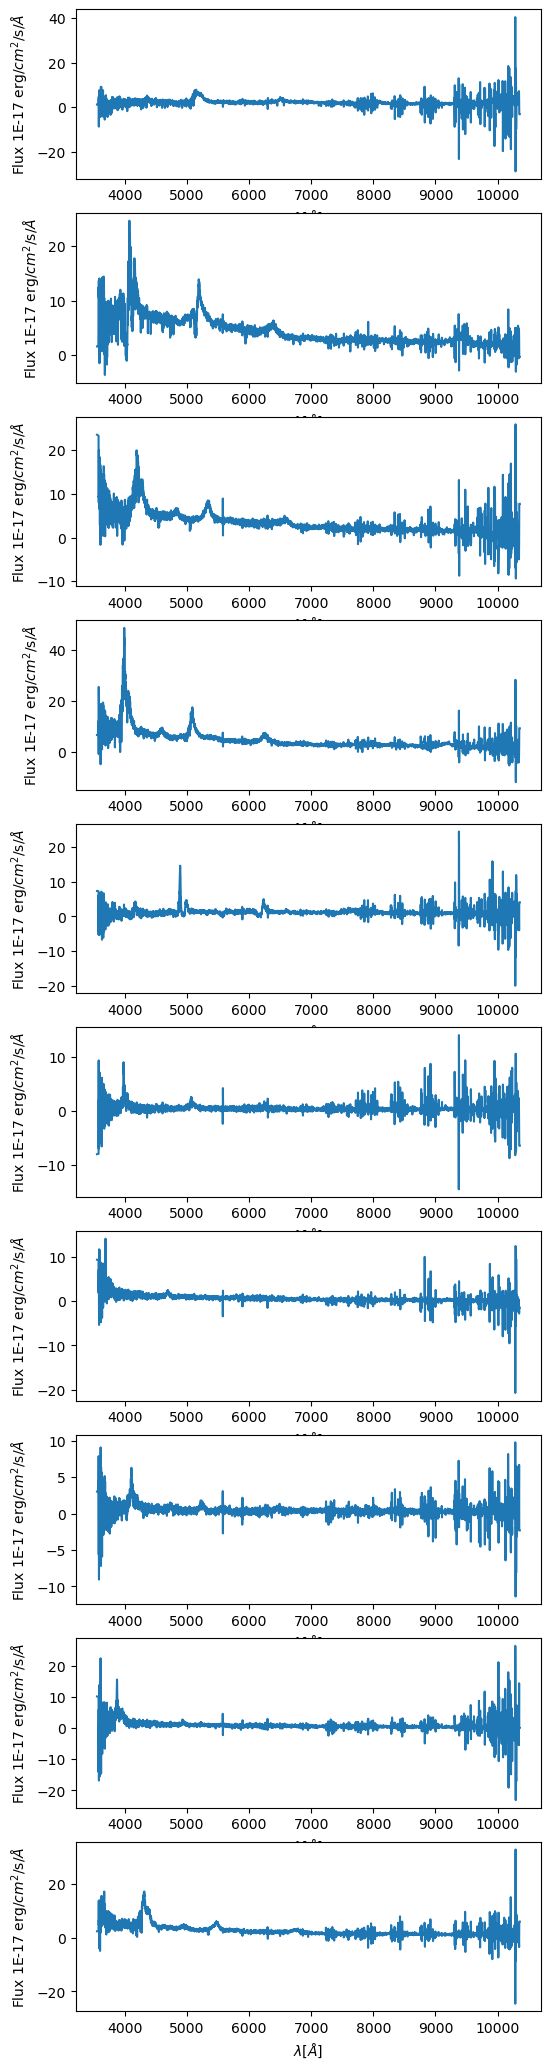

In [86]:
plt.figure(figsize=(6,40),dpi=100)
i = 0
for i in range (10):
    plt.subplot(len(ids_),1,i+1)
    plt.plot(wavelengths, flux[i])
    plt.ylabel('Flux 1E-17 erg/$cm^2$/s/$\AA$')
    plt.xlabel('$\lambda [\AA]$')
    i+=1

In [87]:
from sklearn.decomposition import PCA
n_components = 10
spec_mean = flux.mean(0)
pca = PCA(n_components - 1, random_state=0, svd_solver='randomized')
pca.fit(flux)
pca_comp = np.vstack([spec_mean, pca.components_])
evals = pca.explained_variance_ratio_
evecs = evals.cumsum()
evecs /= evecs[-1]

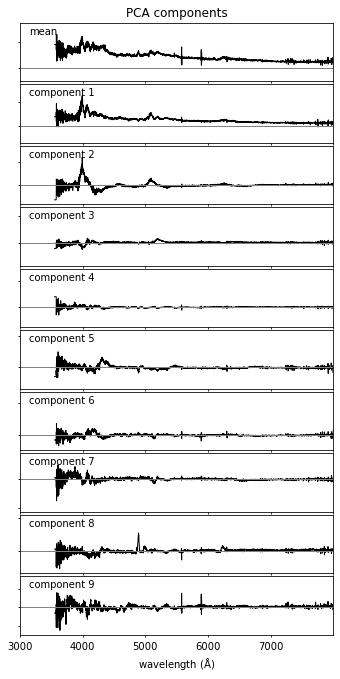

In [88]:
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                    bottom=0.1, top=0.95, hspace=0.05)

titles = ['PCA components']

for i, comp in enumerate([pca_comp]):
    for j in range(n_components):
        ax = fig.add_subplot(n_components, 3, 3 * j + 1 + i)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.xaxis.set_major_locator(
                plt.FixedLocator(list(range(3000, 7999, 1000))))
            ax.set_xlabel(r'wavelength ${\rm (\AA)}$')
        
        ax.plot(wavelengths, comp[j], '-k', lw=1)
        
        # plot zero line
        xlim = [3000, 8000]
        ax.plot(xlim, [0, 0], '-', c='gray', lw=1)

        if j == 0:
            ax.set_title(titles[i])

        if titles[i].startswith('PCA') or titles[i].startswith('ICA'):
            if j == 0:
                label = 'mean'
            else:
                label = 'component %i' % j
        else:
            label = 'component %i' % (j + 1)

        ax.text(0.03, 0.94, label, transform=ax.transAxes,
                ha='left', va='top')

        for l in ax.get_xticklines() + ax.get_yticklines():
            l.set_markersize(2)

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])

        ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)
        ax.set_xlim(xlim)

In [89]:
evecs = pca_comp
spec = flux[8]
coeff = np.dot(evecs, spec-spec_mean)

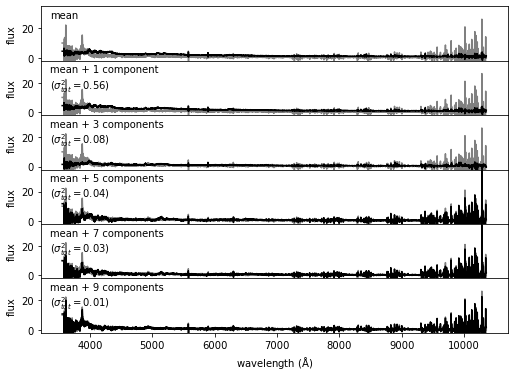

In [90]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0,1,3,5,7,9]):
    ax = fig.add_subplot(911+i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths,spec_mean + np.dot(coeff[1:n], evecs[1:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 35)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals[n - 1]
    else:
        
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()